### Data Exploration 

In [1]:
import pandas as pd

# Load the dataset to inspect its structure
tweet_data = pd.read_csv('../data_file/tweet_sentiments.csv', encoding='ISO-8859-1')

# Display the first few rows of the dataset
tweet_data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


The dataset consists of the following key columns:

* `tweet_text`: The actual text of the Tweet.
* `emotion_in_tweet_is_directed_at`: The product or brand mentioned in the Tweet (e.g., iPhone, iPad, Google).
* `is_there_an_emotion_directed_at_a_brand_or_product`: The sentiment or emotion expressed in the Tweet (e.g., Positive emotion, Negative emotion).

In [2]:
# Get a summary of the dataset, including data types and non-null counts
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


The dataset information:

- The dataset contains **9,093 entries** and **3 columns**.
- All the columns are of the data type **object** (textual data).
- The dataset has some missing values in the `tweet_text` and `emotion_in_tweet_is_directed_at` columns.

In [3]:
# Display a summary of the missing values
tweet_data.isnull().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

The missing values in the dataset:

- `tweet_text`: 1 missing value
- `emotion_in_tweet_is_directed_at`: 5802 missing values - could suggest that for many tweets, the emotion is not directed at a specific brand or product.  Also, this column is not crucial for sentiment classification as our primary target is the sentiment.
- `is_there_an_emotion_directed_at_a_brand_or_product`: 0 missing values

In [4]:
# Check the distribution of the sentiment
sentiment_distribution = tweet_data['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

# Display the sentiment distribution
sentiment_distribution

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

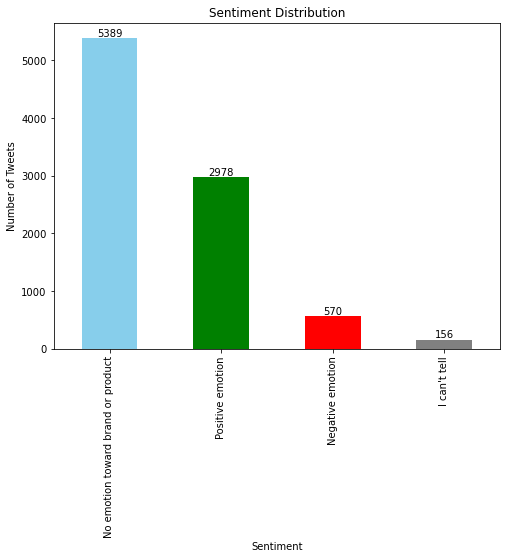

In [5]:
import matplotlib.pyplot as plt

# Visualize the sentiment distribution
plt.figure(figsize=(8, 6))
ax = sentiment_distribution.plot(kind='bar', color=['skyblue', 'green', 'red', 'gray'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=90)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')

plt.show()

The sentiment distribution shows a significant imbalance. Majority of the tweets (5,389) have no emotion directed at a brand or product, while positive emotions (2,978) are significantly more represented than negative emotions (570). 156 instances are labeled as "I can't tell" which we could remove or filter out.

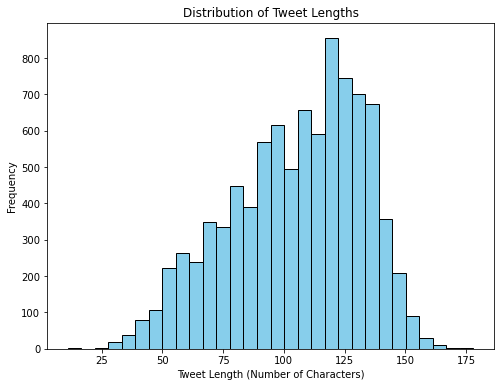

In [6]:
# Analyze the text length by calculating the number of characters in each tweet
tweet_lengths = tweet_data['tweet_text'].str.len()

# Plot the distribution of tweet lengths
plt.figure(figsize=(8, 6))
plt.hist(tweet_lengths, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length (Number of Characters)')
plt.ylabel('Frequency')
plt.show()

Most tweets appear to fall within a moderate length range, with the majority clustered between shorter lengths (as expected with tweet constraints). Since the dataset is not too huge, we will not truncate the tweets during tokenization.

In [7]:
from collections import Counter
from nltk.tokenize import word_tokenize

# Clean the tweet_text by dropping rows with missing text values
tweet_data_cleaned = tweet_data.dropna(subset=['tweet_text'])

# Tokenize the cleaned tweets by sentiment
positive_tweets = tweet_data_cleaned[tweet_data_cleaned['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Positive emotion']['tweet_text'].str.split()
negative_tweets = tweet_data_cleaned[tweet_data_cleaned['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Negative emotion']['tweet_text'].str.split()
neutral_tweets = tweet_data_cleaned[tweet_data_cleaned['is_there_an_emotion_directed_at_a_brand_or_product'] == 'No emotion toward brand or product']['tweet_text'].str.split()

# Flatten the tokenized tweets into a single list per sentiment
positive_words = [word.lower() for tweet in positive_tweets for word in tweet if word]
negative_words = [word.lower() for tweet in negative_tweets for word in tweet if word]
neutral_words = [word.lower() for tweet in neutral_tweets for word in tweet if word]

# Count the most common words in each sentiment
positive_common_words = Counter(positive_words).most_common(10)
negative_common_words = Counter(negative_words).most_common(10)
neutral_common_words = Counter(neutral_words).most_common(10)

positive_common_words, negative_common_words, neutral_common_words

([('#sxsw', 2506),
  ('@mention', 2062),
  ('the', 1578),
  ('{link}', 1202),
  ('to', 1146),
  ('at', 999),
  ('rt', 913),
  ('for', 904),
  ('ipad', 793),
  ('a', 777)],
 [('#sxsw', 512),
  ('the', 300),
  ('@mention', 292),
  ('to', 255),
  ('is', 159),
  ('a', 151),
  ('ipad', 140),
  ('at', 137),
  ('rt', 137),
  ('of', 131)],
 [('#sxsw', 4680),
  ('@mention', 4249),
  ('{link}', 2904),
  ('the', 2409),
  ('to', 2112),
  ('at', 1868),
  ('rt', 1814),
  ('for', 1474),
  ('a', 1281),
  ('google', 1187)])

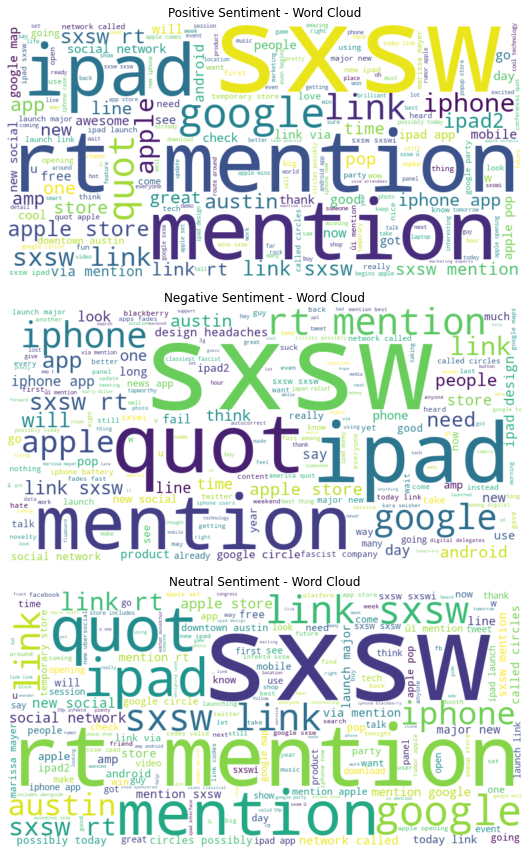

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word clouds for each sentiment category
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_words))
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_words))
neutral_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(neutral_words))

# Plot the word clouds for each sentiment
plt.figure(figsize=(16, 12))

# Positive sentiment word cloud
plt.subplot(3, 1, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment - Word Cloud')

# Negative sentiment word cloud
plt.subplot(3, 1, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiment - Word Cloud')

# Neutral sentiment word cloud
plt.subplot(3, 1, 3)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Neutral Sentiment - Word Cloud')

plt.tight_layout()
plt.show()

The word clouds reveal that event-related terms like **"SXSW"**, **"mention"**, and **"link"** dominate across all sentiment categories, indicating that the dataset contains many tweets focused on the SXSW event rather than expressing sentiment. Product-related terms like **"iPhone"**, **"iPad"**, and **"Google"** are also frequent, but sentiment-specific words are limited. This suggests that pre-processing adjustments, such as removing non-informative terms (e.g., mentions, links, hashtags) and refining the handling of product-specific words, could help improve sentiment analysis.

### Data Preparation

**Step 1:** Data Cleaning

In [10]:
# Drop rows with missing 'tweet_text' and the unnecessary 'emotion_in_tweet_is_directed_at' column
cleaned_tweet_data = tweet_data.dropna(subset=['tweet_text']).drop(columns=['emotion_in_tweet_is_directed_at'])

# Rename the 'is_there_an_emotion_directed_at_a_brand_or_product' column to 'sentiment'
cleaned_tweet_data = cleaned_tweet_data.rename(columns={'is_there_an_emotion_directed_at_a_brand_or_product': 'sentiment'})

# Remove rows where 'sentiment' column has "I can't tell"
cleaned_tweet_data = cleaned_tweet_data[cleaned_tweet_data['sentiment'] != "I can't tell"]

# Rename 'No emotion toward brand or product' to 'Neutral emotion'
cleaned_tweet_data['sentiment'] = cleaned_tweet_data['sentiment'].replace("No emotion toward brand or product", "Neutral emotion")

# Display the first few rows of the cleaned dataset
cleaned_tweet_data.head()

,tweet_text,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


In [11]:
# Cross-checking that there are no missing values
missing_values = cleaned_tweet_data.isnull().sum()

missing_values

tweet_text    0
sentiment     0
dtype: int64

In [12]:
# Check the distribution of the sentiment column
sentiment_distribution = cleaned_tweet_data['sentiment'].value_counts()

# Display the sentiment distribution
sentiment_distribution

Neutral emotion     5388
Positive emotion    2978
Negative emotion     570
Name: sentiment, dtype: int64

The dataset has been successfully cleaned by removing the missing entries from the `tweet_text` column,  dropping the irrelevant `emotion_in_tweet_is_directed_at` column, renaming the `is_there_an_emotion_directed_at_a_brand_or_product` to `sentiment`, renaming **No emotion toward brand or product** cells to **Neutral emotion** and removing cells with **I can't tell** under `sentiment`.

**Step 2:** Data Preprocessing

In [5]:
# Import necessary libraries for text preprocessing
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Define stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function for text preprocessing
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenization
    words = word_tokenize(text)
    # Remove stop words and lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Apply the preprocessing function to the 'tweet_text' column
cleaned_tweet_data['cleaned_text'] = cleaned_tweet_data['tweet_text'].apply(preprocess_text)

# Display the first few rows of the preprocessed data
cleaned_tweet_data[['tweet_text', 'cleaned_text']].head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\engig\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\engig\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\engig\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,tweet_text,cleaned_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,wesley g iphone hr tweeting riseaustin dead ne...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,jessedee know fludapp awesome ipadiphone app y...
2,@swonderlin Can not wait for #iPad 2 also. The...,swonderlin wait ipad also sale sxsw
3,@sxsw I hope this year's festival isn't as cra...,sxsw hope year festival isnt crashy year iphon...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,sxtxstate great stuff fri sxsw marissa mayer g...


The `cleaned_text` column now contains preprocessed Tweet text, which has been:

* Converted to lowercase.
* Stripped of punctuation and special characters.
* Tokenized, with stop words removed.
* Lemmatized to reduce words to their base form.

**Step 3:** Feature Engineering

Convert the cleaned text into numerical features using Term Frequency-Inverse Document Frequency (TF-IDF).

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the TF-IDF Vectorizer with a maximum of 5000 features and stop words removed
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the cleaned text data into TF-IDF features
X_tfidf = tfidf_vectorizer.fit_transform(cleaned_tweet_data['cleaned_text'])

# Display the shape of the resulting TF-IDF matrix
X_tfidf.shape

(9092, 5000)

The resulting matrix contains 9,092 rows (one for each Tweet) and 5,000 TF-IDF features (words or terms) based on the cleaned text data. Each cell in the matrix represents the TF-IDF score for a specific word in a specific Tweet

In [7]:
# Convert the sparse TF-IDF matrix to a dense array
tfidf_sample = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the first 5 rows and first 10 columns of the TF-IDF matrix
print(tfidf_sample.iloc[:5, :10])

   aapl  aaron  aarpbulletin   ab  abacus  abba  abc  ability  able  abnormal
0   0.0    0.0           0.0  0.0     0.0   0.0  0.0      0.0   0.0       0.0
1   0.0    0.0           0.0  0.0     0.0   0.0  0.0      0.0   0.0       0.0
2   0.0    0.0           0.0  0.0     0.0   0.0  0.0      0.0   0.0       0.0
3   0.0    0.0           0.0  0.0     0.0   0.0  0.0      0.0   0.0       0.0
4   0.0    0.0           0.0  0.0     0.0   0.0  0.0      0.0   0.0       0.0


Above displays a small portion of the matrix, showing how the first 5 Tweets relate to the first 10 words in the vocabulary. The values represent the TF-IDF scores for each word in each Tweet.

## Modeling

### 1. Binary Classification

Converted the sentiment labels into a binary classification problem (positive vs. negative). Trained binary classifiers models like Logistic Regression, Random Forest and SVM using the TF-IDF features.

#### 1a. Tuned Logistic Regression Model

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# Convert sentiment labels into a binary classification task (positive vs. negative)
# Exclude 'No emotion' and 'I can't tell' classes for this binary task
binary_data = cleaned_tweet_data[cleaned_tweet_data['is_there_an_emotion_directed_at_a_brand_or_product'].isin(['Positive emotion', 'Negative emotion'])]

# Re-apply the TF-IDF transformation on the filtered data
X_tfidf_binary = tfidf_vectorizer.transform(binary_data['cleaned_text'])

# Prepare target variable (1 for positive, 0 for negative)
y_binary = binary_data['is_there_an_emotion_directed_at_a_brand_or_product'].apply(lambda x: 1 if x == 'Positive emotion' else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_binary, y_binary, test_size=0.2, random_state=42, stratify=y_binary)

# Apply SMOTE to the training data to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define the hyperparameter grid to search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2'],  # Penalty norm (L1 norm is typically supported with 'liblinear' or 'saga')
    'solver': ['liblinear', 'saga']  # Solvers compatible with penalty
}

# Initialize the Logistic Regression model
logreg = LogisticRegression(class_weight='balanced', max_iter=1000)

# Set up GridSearchCV with 3-fold cross-validation
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)

# Fit the GridSearchCV to the SMOTE-balanced training data
grid_search.fit(X_train_smote, y_train_smote)

# Display the best hyperparameters found
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the best model found by GridSearchCV
best_logreg = grid_search.best_estimator_
y_pred_best = best_logreg.predict(X_test)

# Evaluate the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_best)
report_tuned = classification_report(y_test, y_pred_best, target_names=['Negative', 'Positive'])

# Display the evaluation scores
print(f"Accuracy after Tuning: {accuracy_tuned}")
print("Classification Report after Tuning:\n", report_tuned)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy after Tuning: 0.8774647887323944
Classification Report after Tuning:
               precision    recall  f1-score   support

    Negative       0.62      0.61      0.61       114
    Positive       0.92      0.93      0.93       596

    accuracy                           0.88       710
   macro avg       0.77      0.77      0.77       710
weighted avg       0.88      0.88      0.88       710



Results for the binary classification task with a tuned logistic regression model:

* **Accuracy:** 88%

* **Negative Class (Precision: 0.62, Recall: 0.61, F1-score: 0.61):** The model performs moderately well at identifying negative sentiment, with a precision of 0.62 and recall of 0.61. This indicates that while the model captures 61% of actual negative tweets, it also has some false positives, meaning it is not fully confident in its negative predictions. The F1-score of 0.61 shows a reasonable balance between precision and recall, but there is room for improvement in recall to better identify more negative cases.

* **Positive Class (Precision: 0.92, Recall: 0.93, F1-score: 0.93):** The model performs excellently with positive sentiment, achieving high precision (0.92) and recall (0.93). This shows that the model is very good at both identifying and classifying positive tweets, with very few false positives and missed positive cases. The high F1-score of 0.93 reflects the model's strength in consistently capturing positive sentiment accurately.

#### 1b. Tuned Random Forest

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required to be at a leaf node
    'max_features': ['auto', 'sqrt']   # Number of features to consider at each split
}

# Initialize the Random Forest model
rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42)

# Set up GridSearchCV with 3-fold cross-validation
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)

# Fit the GridSearchCV to the SMOTE-balanced training data
grid_search_rf.fit(X_train_smote, y_train_smote)

# Display the best hyperparameters found
best_params_rf = grid_search_rf.best_params_
print(f"Best Parameters: {best_params_rf}")

# Train the best model found by GridSearchCV
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate the tuned model
accuracy_tuned_rf = accuracy_score(y_test, y_pred_best_rf)
report_tuned_rf = classification_report(y_test, y_pred_best_rf, target_names=['Negative', 'Positive'])

# Display the evaluation scores
print(f"Accuracy after Tuning: {accuracy_tuned_rf}")
print("Classification Report after Tuning:\n", report_tuned_rf)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy after Tuning: 0.8873239436619719
Classification Report after Tuning:
               precision    recall  f1-score   support

    Negative       0.83      0.38      0.52       114
    Positive       0.89      0.98      0.94       596

    accuracy                           0.89       710
   macro avg       0.86      0.68      0.73       710
weighted avg       0.88      0.89      0.87       710



Results for the binary classification task with tuned Random Forest model:

* **Accuracy:** 89%

* **Negative Class (Precision: 0.83, Recall: 0.38, F1-Score: 0.52):** The random forest model has a high precision of 0.83 for the negative class, meaning that when it predicts negative sentiment, it is correct 83% of the time. However, its recall is low at 0.38, meaning it only captures 38% of the actual negative cases. This indicates that the model misses a significant portion of negative sentiment. The overall F1-score is 0.52, reflecting the trade-off between precision and recall.

* **Positive Class (Precision: 0.89, Recall: 0.98, F1-Score: 0.94):** The model performs very well on the positive class with high precision (0.89) and recall (0.98), meaning it captures almost all positive cases while maintaining a high level of confidence in its predictions. The F1-score of 0.94 shows excellent performance in predicting positive sentiment. performance.

#### 1c. Tuned SVM Model

In [10]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Linear or RBF kernel
    'gamma': [0.01, 0.1, 1, 10]  # Kernel coefficient for non-linear kernels
}

# Initialize the SVM model
svm_model = SVC(class_weight='balanced', random_state=42)

# Set up GridSearchCV with cross-validation
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)

# Fit the GridSearchCV to the SMOTE-balanced training data
grid_search_svm.fit(X_train_smote, y_train_smote)

# Display the best hyperparameters found
best_params_svm = grid_search_svm.best_params_
print(f"Best Parameters for SVM: {best_params_svm}")

# Train the best model found by GridSearchCV
best_svm = grid_search_svm.best_estimator_
y_pred_best_svm = best_svm.predict(X_test)

# Evaluate the tuned SVM model
accuracy_svm = accuracy_score(y_test, y_pred_best_svm)
report_svm = classification_report(y_test, y_pred_best_svm, target_names=['Negative', 'Positive'])

# Display the evaluation scores
print(f"Accuracy after SVM Tuning: {accuracy_svm}")
print("Classification Report after SVM Tuning:\n", report_svm)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Parameters for SVM: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Accuracy after SVM Tuning: 0.8845070422535212
Classification Report after SVM Tuning:
               precision    recall  f1-score   support

    Negative       0.85      0.34      0.49       114
    Positive       0.89      0.99      0.93       596

    accuracy                           0.88       710
   macro avg       0.87      0.67      0.71       710
weighted avg       0.88      0.88      0.86       710



Results for the binary classification task with tuned SVM model:

* **Accuracy:** 88%

* **Negative Class (Precision: 0.85, Recall: 0.34, F1-Score: 0.49):** The model performs very well in terms of precision for the negative class, meaning that when the model predicts negative sentiment, it is correct 85% of the time. This reflects the model’s confidence in correctly identifying negative sentiment when it makes a negative prediction. The recall of 0.34 indicates that the model only captures 34% of actual negative cases, meaning it misses a large portion of negative tweets. This shows that the SVM is struggling to recall negative cases. The F1-score for the negative class, which balances precision and recall, is 0.49, reflecting that the model’s performance for the negative class is heavily weighted toward precision but lacks recall, resulting in a lower overall balance.

* **Positive Class (Precision: 0.89, Recall: 0.99, F1-Score: 0.93):** The model performs very well with positive sentiment, achieving 89% precision, meaning that when the model predicts positive sentiment, it is correct most of the time. The recall for the positive class is extremely high at 0.99, meaning that the model correctly identifies 99% of all positive tweets, missing very few positive cases. The F1-score for the positive class is 0.93, reflecting an excellent balance between precision and recall for positive sentiment predictions.

#### Binary Classification Summary:

The tuned random forest model is likely the best fit for a generalized sentiment analysis approach.

While the tuned logistic regression model provides better balance for the negative class, the overall performance of random forest aligns better with the business objective of identifying generalized sentiment trends across social media.

The random forest model is consistent and performs very well for the positive class, with strong precision and recall. Even though its recall for the negative class is lower, its overall accuracy (89%) and performance for positive sentiment—which is likely to be the dominant class in a generalized sentiment analysis—makes it the most robust option for broad trend analysis.



### 2. Multiclass Classification

In [11]:
from sklearn.model_selection import train_test_split

# Filter relevant rows and map sentiment labels to numerical categories
multiclass_data = cleaned_tweet_data[cleaned_tweet_data['is_there_an_emotion_directed_at_a_brand_or_product'].isin(['Positive emotion', 'Negative emotion', 'No emotion toward brand or product'])]

# Re-apply the TF-IDF transformation on the filtered data
X_tfidf_multiclass = tfidf_vectorizer.transform(multiclass_data['cleaned_text'])

# Define the target variable (sentiment)
y_multiclass = multiclass_data['is_there_an_emotion_directed_at_a_brand_or_product'].map({
    'Positive emotion': 1,
    'Negative emotion': 0,
    'No emotion toward brand or product': 2
})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_multiclass, y_multiclass, test_size=0.2, random_state=42, stratify=y_multiclass)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (7148, 5000) (7148,)
Testing set shape: (1788, 5000) (1788,)


In [12]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [13]:
# Check the new class distribution after SMOTE balancing
y_train_smote_series = pd.Series(y_train_smote)
print(y_train_smote_series.value_counts())

2    4310
1    4310
0    4310
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64


#### 2a. Multinomial Naive Bayes Model

In [14]:
from sklearn.naive_bayes import MultinomialNB

# Define the hyperparameter grid for alpha (smoothing parameter)
param_grid = {'alpha': [0.01, 0.1, 0.5, 1, 10]}

# Initialize the Multinomial Naive Bayes model
nb = MultinomialNB()

# Set up GridSearchCV to find the best alpha value
grid_search = GridSearchCV(nb, param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train_smote, y_train_smote)

# Get the best model from GridSearchCV
best_nb = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_nb.predict(X_test)

# Evaluate the tuned model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=['Negative', 'Positive', 'Neutral'])

# Display the best parameters and evaluation metrics
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Parameters: {'alpha': 0.01}
Accuracy: 0.6269574944071589
Classification Report:
               precision    recall  f1-score   support

    Negative       0.36      0.45      0.40       114
    Positive       0.52      0.64      0.57       596
     Neutral       0.76      0.64      0.69      1078

    accuracy                           0.63      1788
   macro avg       0.54      0.58      0.55      1788
weighted avg       0.65      0.63      0.63      1788

